### Titanic Challenge

Diego N. Vilela - April 2020

#### Loading the armament

___

In [1]:
# Importing libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb
from xgboost import XGBClassifier as XGB
from sklearn.model_selection import train_test_split as TTS
%matplotlib inline

In [2]:
# Loading data

df_train = pd.read_csv('../Data/train.csv')
df_test = pd.read_csv('../Data/test.csv')

#### Knowing the enemy - Sun Tzu mode on

___

In [3]:
# Cheking train data

df_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
# Cheking test data

df_test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [5]:
# Cheking the null or blank values

pd.DataFrame({'Train': df_train.drop('Survived', axis = 1).isna().sum(), 'Test': df_test.isna().sum()})

,Train,Test
PassengerId,0,0
Pclass,0,0
Name,0,0
Sex,0,0
Age,177,86
SibSp,0,0
Parch,0,0
Ticket,0,0
Fare,0,1
Cabin,687,327


**Note:** With the exception of the 'survived' field, the sets share the same characteristics, as well as lacking some information. In this way, I believe that joining the sets into one will facilitate the treatment of the data.

In [6]:
# First, it is necessary to identify each data set so that they can be segmented after treatment.

df_train['Set'] = 'Train'
df_test['Set'] = 'Test'

# Now, blend.

df = pd.concat([df_train.drop('Survived', axis = 1), df_test])
df.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Set
0,1,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,Train
1,2,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,Train
2,3,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,Train
3,4,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,Train
4,5,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,Train


Nice. It's time to show some art on train data.

In [7]:
df_train.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
Set             object
dtype: object

Here, we have 3 data types, int64, float64 and object. Let's start on float data.

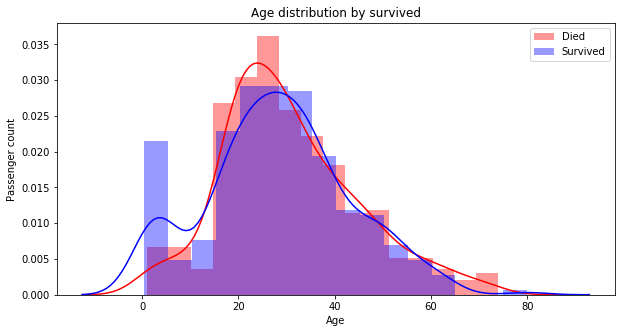

In [8]:
plt.figure(figsize=(10,5))
sb.distplot(df_train[df_train['Survived'] == 0]['Age'].dropna(), color='red')
sb.distplot(df_train[df_train['Survived'] == 1]['Age'].dropna(), color='blue')
plt.ylabel('Passenger count')
plt.title('Age distribution by survived')
plt.legend(['Died', 'Survived'])
plt.show()

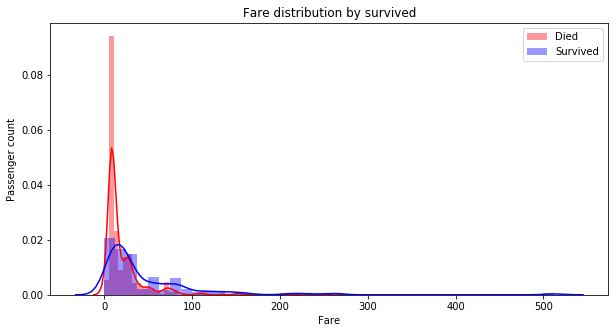

In [9]:
plt.figure(figsize=(10,5))
sb.distplot(df_train[df_train['Survived'] == 0]['Fare'].dropna(), color='red')
sb.distplot(df_train[df_train['Survived'] == 1]['Fare'].dropna(), color='blue')
plt.ylabel('Passenger count')
plt.title('Fare distribution by survived')
plt.legend(['Died', 'Survived'])
plt.show()

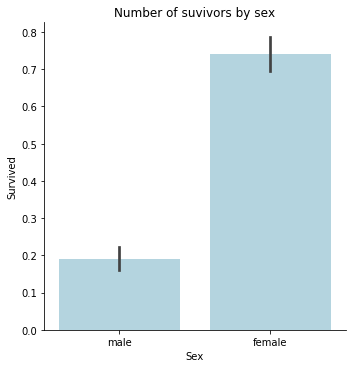

In [10]:
sb.catplot(x = 'Sex', y = 'Survived', data = df_train, kind = 'bar', color='lightblue')
plt.title('Number of suvivors by sex')
plt.show()

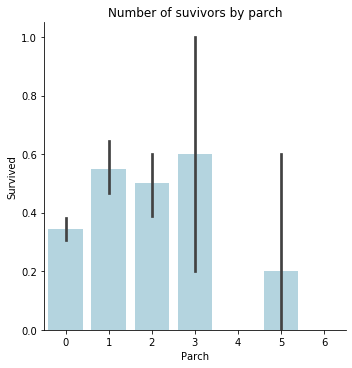

In [11]:
sb.catplot(x = 'Parch', y = 'Survived', data = df_train, kind = 'bar', color='lightblue')
plt.title('Number of suvivors by parch')
plt.show()

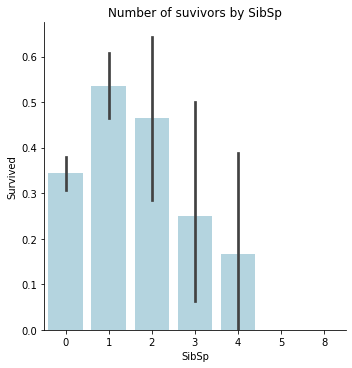

In [12]:
sb.catplot(x = 'SibSp', y = 'Survived', data = df_train, kind = 'bar', color='lightblue')
plt.title('Number of suvivors by SibSp')
plt.show()

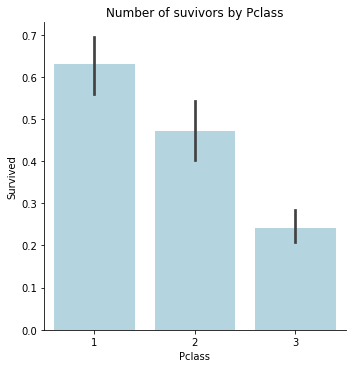

In [13]:
sb.catplot(x = 'Pclass', y = 'Survived', data = df_train, kind = 'bar', color='lightblue')
plt.title('Number of suvivors by Pclass')
plt.show()

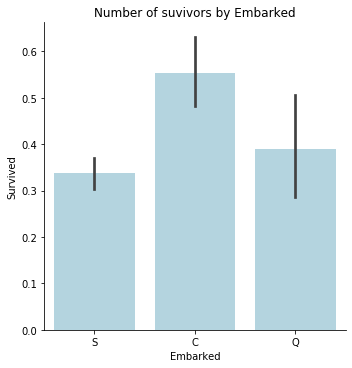

In [14]:
sb.catplot(x = 'Embarked', y = 'Survived', data = df_train, kind = 'bar', color='lightblue')
plt.title('Number of suvivors by Embarked')
plt.show()

We can come to some conclusions:

* the social class (fare and class) indicate that the poorest have a high chance of death;

* the female sex, as well as having an average number of people in the family, have a great chance of surviving;

#### Sharpening the knife

___

Time to get your hands dirty, working on missing values and creating new features.

In [15]:
# Extract the title

df['Title'] = [s.split(', ')[1].split('.')[0] for s in df['Name']]

In [16]:
# Crate a dictionary of age means by Title

age_dict = df.groupby('Title')['Age'].mean().astype(int).to_dict()

In [17]:
# Replace nan values with the age mean

df['Age'] = [age_dict[t] if pd.isna(a) else a for a, t in zip(df['Age'], df['Title'])]

In [18]:
# Age category

df['Age_Class'] = pd.cut(df['Age'].astype(int), 8, labels=range(8))
df['Age_Class'] = df['Age_Class'].astype(int)

In [19]:
# Family size

df['Family'] = df['SibSp'] + df['Parch'] + 1

In [20]:
# Change de sex values

df['Sex'].replace({'male':1, 'female': 0}, inplace = True)

In [21]:
# Change de embarked values

df['Embarked'].replace({'C':0, 'Q': 1, 'S': 2}, inplace = True)
df['Embarked'].fillna(df['Embarked'].mean(), inplace = True)

In [22]:
# Fare values

df['Fare'].fillna(df['Fare'].mean(), inplace = True)

In [23]:
# Titles

title_dict = {k:i for i,k in enumerate(df.Title.unique())}

df['Title'].replace(title_dict, inplace = True)

In [24]:
# Passenger have a cabin?


df['Cabin'] = [c[0] if not(pd.isna(c)) else 'X' for c in df['Cabin']]

cabin_dict = {k:i for i,k in enumerate(df.Cabin.unique())}

df['Cabin'].replace(cabin_dict, inplace = True)

In [25]:
# Fare by person

df['Cost'] = df['Fare'] / df['Family']

In [26]:
# Is single?

df['Single'] = np.where(df['Family'] == 1, 1, 0)

In [27]:
# Drop the columns and few null values

df.drop(['PassengerId', 'Name', 'Ticket'], axis = 1, inplace = True)

In [28]:
df.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked,Set,Title,Age_Class,Family,Cost,Single
0,3,1,22.0,1,0,7.2500,0,2.0,Train,0,2,2,3.62500,0
1,1,0,38.0,1,0,71.2833,1,0.0,Train,1,3,2,35.64165,0
2,3,0,26.0,0,0,7.9250,0,2.0,Train,2,2,1,7.92500,1
3,1,0,35.0,1,0,53.1000,1,2.0,Train,1,3,2,26.55000,0
4,3,1,35.0,0,0,8.0500,0,2.0,Train,0,3,1,8.05000,1


In [29]:
df.isna().sum()

Pclass       0
Sex          0
Age          0
SibSp        0
Parch        0
Fare         0
Cabin        0
Embarked     0
Set          0
Title        0
Age_Class    0
Family       0
Cost         0
Single       0
dtype: int64

Ok! Data sounds good. Now , time to use some computer brain.

In [30]:
# Split the data in train and test

df_train_n = pd.concat([df[df['Set'] == 'Train'].drop('Set', axis = 1), df_train['Survived']], axis = 1)
df_test_n = df[df['Set'] == 'Test'].drop(['Set'], axis = 1)

In [31]:
# Getting the vectors

X_train, X_test, y_train, y_test = TTS(df_train_n.drop('Survived', axis = 1), df_train_n['Survived'], test_size=0.33, random_state=0)

In [32]:
# Fit the model on train data

model = XGB(n_estimators = 100).fit(X_train, y_train)
model.score(X_train, y_train)

0.9815436241610739

Wow. Nice score!

In [33]:
# Checking the fatures importance

pd.DataFrame({'Feature': X_train.columns, 'Importance': model.feature_importances_}).sort_values('Importance', ascending=False)

,Feature,Importance
8,Title,0.409679
10,Family,0.207207
0,Pclass,0.114776
1,Sex,0.056329
3,SibSp,0.037606
11,Cost,0.033895
2,Age,0.030084
6,Cabin,0.028683
5,Fare,0.028343
4,Parch,0.027241


Let's predict the data from Kaggle :)

In [34]:
# Predicting 

y_pred_k = model.predict(df_test_n)

In [35]:
# Rounding the probabilities

y_pred_k = np.where(y_pred_k >= 0.5, 1, 0)

In [36]:
# Creating the dataframe to export

df_k = pd.DataFrame({'PassengerId': df_test['PassengerId'], 'Survived': y_pred_k})

In [37]:
df_k.head()

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,1
4,896,1


In [38]:
# Exporting the data

df_k.to_csv('../Results/Titanic_prediction.csv', sep = ',', index = None)